<a href="https://colab.research.google.com/github/strawbaeri/CCINSYSL_ASSIGNMENT_COM-DF211/blob/main/exercise_5_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5 B

In [70]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [71]:
faces = fetch_olivetti_faces()

In [72]:
faces.data.shape

(400, 4096)

In [73]:
faces.images.shape

(400, 64, 64)

In [74]:
faces.target.shape

(400,)

In [75]:
faces.target[200]

20

#### 1. Plot the image of index zero

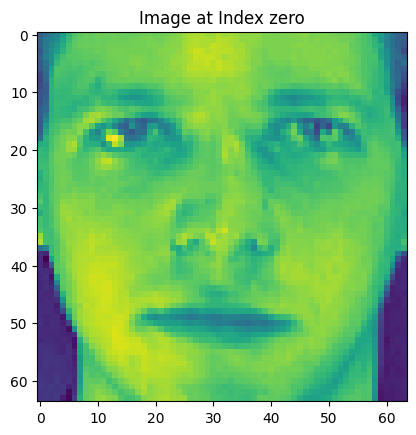

In [76]:
plt.imshow(faces.images[0])
plt.title('Image at Index zero')
plt.show()


#### 2. Create a subplot of 10 images in a 3x3 configuration

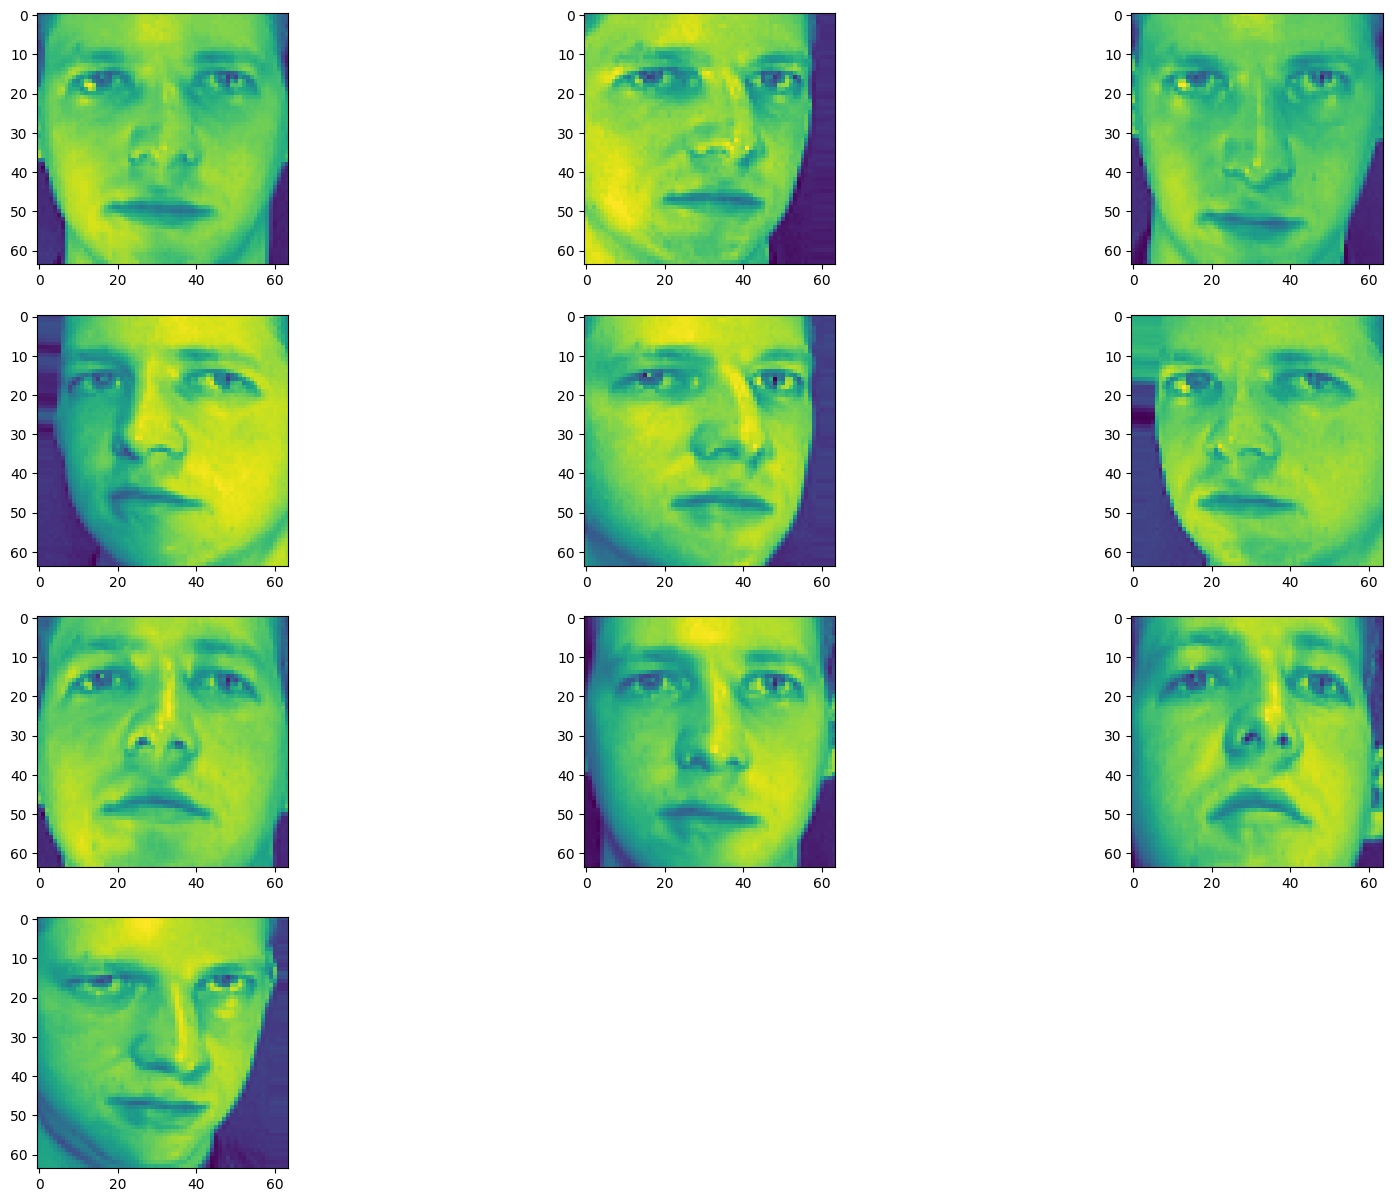

In [77]:
plt.figure(figsize=(20, 15))
for index, (image, label) in enumerate(zip(faces.images[0:10], faces.target[0:10])):
    plt.subplot(4, 3, index + 1)  # Adjusted the subplot size to match the number of images
    plt.imshow(image)

plt.show()


#### 3. Split the data into a training and test set

In [78]:

train_img, test_img, train_lbl, test_lbl = train_test_split(
    faces.data, faces.target, test_size=1/7.0, random_state=0)


#### 4. Create a new instance of the LogisticRegression class

In [79]:
logisticRegr = LogisticRegression()

#### 5. Train the model using the training set using the `fit()` function

In [80]:
logisticRegr.fit(train_img, train_lbl)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### 6. Use the test data to test the model using the `predict()` function

In [81]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array([13])

#### 7. Get the accuracy using the `score()` function

In [82]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9655172413793104


In [83]:
predictions = logisticRegr.predict(test_img)

#### 8. Collect all the misclassified images and create a plot for visualization

In [84]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict:
        misclassifiedIndexes.append(index)
    index +=1

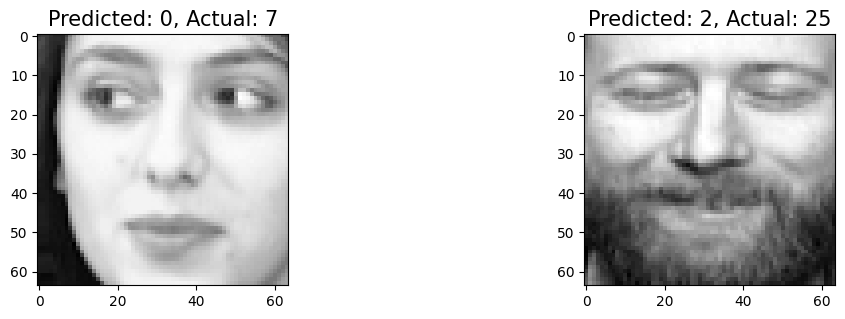

In [85]:
plt.figure(figsize=(20,15))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:10]):
    plt.subplot(4, 3, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (64,64)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

## Gradient Descent

#### 9. Use the `SGDClassifier()` to use gradient descent to minimize the loss

In [117]:
clf = SGDClassifier(loss="log_loss", penalty="l2", alpha=0.00001, learning_rate="optimal", eta0=0.0)


#### 10. Train the model using the training set using the `fit()` function

In [118]:
clf.fit(train_img, train_lbl)

SGDClassifier(alpha=1e-05, loss='log_loss')

#### 11. Use the test data to test the model using the `predict()` function

In [119]:
y_pred = clf.predict(test_img)

#### 12. Get the accuracy using the `score()` function

In [120]:
score = clf.score(test_img, test_lbl)
print(score)

0.9137931034482759


#### 13. Find the best number of iterations to get the best accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.896551724137931


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.8103448275862069


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.7931034482758621


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.8103448275862069


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.8275862068965517


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.8620689655172413


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.9137931034482759


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.8275862068965517


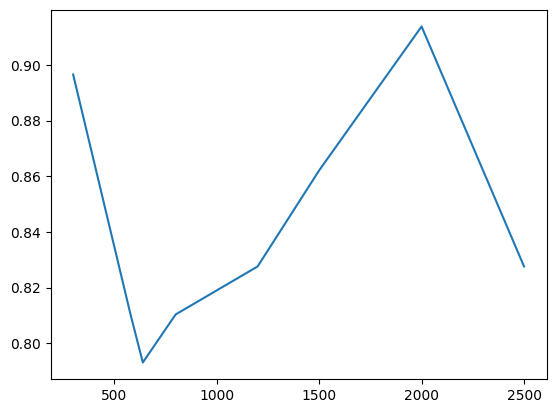

In [136]:
max_iter = [300, 580, 640, 800, 1200, 1500, 2000, 2500]
calculated_scores = []
for i in max_iter:
  clf = SGDClassifier(loss="log", penalty="l2", max_iter=i)
  clf.fit(train_img, train_lbl)
  y_pred = clf.predict(test_img)
  score = clf.score(test_img, test_lbl)

  calculated_scores.append(score)
  print(score)

plt.plot(max_iter, calculated_scores)

#0.9137931034482759 accuracy same as #12